<a href="https://colab.research.google.com/github/ThanuMahee12/ayush-vision/blob/yolo/Algorithums/detection/Yolo/YOLO_Tumber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLO Tumber

## Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
basicdata={'account':'thanuworld6@gmail.com','user':"Yuka"}


In [ ]:
! locale-gen en_US.UTF-8
! export LC_ALL=en_US.UTF-8

Generating locales (this might take a while)...
  en_US.UTF-8... done
Generation complete.


## Intallations

In [ ]:
!pip install firebase-admin

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.6/871.6 kB 13.9 MB/s eta 0:00:00


## Imports

In [ ]:
import firebase_admin


In [ ]:
from firebase_admin import credentials,storage


In [ ]:
from firebase_admin import firestore

In [ ]:
from ultralytics import YOLO

In [ ]:
from datetime import date,datetime

In [ ]:
import os

In [ ]:
import numpy as np

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
import random

In [ ]:
import yaml

In [ ]:
import csv

In [ ]:
import json

## Config

In [ ]:
epochs=60
imageSize=640
optimizer='Adam'
dropout=0.5

### Dirctory

In [ ]:
work_dirctory="/content/drive/MyDrive/AyushVision/yolo8/training"
work_dirctory_root="/content/drive/MyDrive/AyushVision/yolo"
firebase_key="/content/drive/MyDrive/ServiceKey.json"

In [ ]:
# today_work_dirctory=f"{work_dirctory}/{date.today().strftime('%d_%m_%Y')}/{datetime.now().strftime('%H%M%S')}"
today_work_dirctory=f"/content/drive/MyDrive/AyushVision/yolo8/training/13_09_2024/202051"


In [ ]:
if not os.path.exists(work_dirctory):
  os.makedirs(work_dirctory,exist_ok=True)
if not os.path.exists(today_work_dirctory):
  os.makedirs(today_work_dirctory,exist_ok=True)

In [ ]:
data="/content/drive/MyDrive/AyushVision/yolo/dataset/final/data.yaml"

In [ ]:
project=f"{today_work_dirctory}/tumber/runs"
name=f'train{epochs}'

## Firebase

In [ ]:
cred = credentials.Certificate(firebase_key)
firebase_admin.initialize_app(cred,{
    'storageBucket': 'ayush-vision-asw4gh.appspot.com'
})

In [ ]:
db = firestore.client()

In [ ]:
bucket = storage.bucket()

In [ ]:
yolo_ref = db.collection("training1").document('yolo')
doc = yolo_ref.get()

In [ ]:
if not doc.exists:
  doc_ref= db.collection("training1").document('yolo')
  doc_ref.set({'algorithum':'yolo','version':'V8','mode':'detection','url':'ultralytics'})
else:
  doc_ref= yolo_ref

### Roboflow

## Model

In [ ]:
# document_id=f'{datetime.now().strftime(f"%Y%m%d%H%S")}_{epochs}'
document_id="202409132013_60"

In [ ]:
storagepath=f'training/yolo/tumber/{document_id}'

In [ ]:
today_ref=doc_ref.collection("Tumber").document(document_id)

In [ ]:
basicdata['imageSize']=imageSize
basicdata['project']=project
basicdata['name']=name
basicdata['training_date']=datetime.now().strftime("%Y/%m/%d %H:%M:%S")
basicdata['filename']='YOLO_Tumber'

In [ ]:
with open(data, 'r') as file:
    yaml_content = yaml.safe_load(file)

In [ ]:
basicdata['names']=yaml_content['names']

In [ ]:
today_ref.set(basicdata)

update_time {
  seconds: 1726262224
  nanos: 809250000
}

In [ ]:
yolo_model = YOLO('yolov8n.yaml').load('yolov8n.pt')

Transferred 355/355 items from pretrained weights


#### Training

In [ ]:
results = yolo_model.train(
    data=data,
    name=name,
    epochs=epochs,
    imgsz=imageSize,
    project=project,
    optimizer=optimizer,
    plots=True,
    dropout=dropout,
    patience=10,
    save=True,
    save_period=10,
    exist_ok=True,
    verbose=True,
    cos_lr=True,
    weight_decay=0.007,
    val=True

    )

Ultralytics YOLOv8.2.93 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/AyushVision/yolo/dataset/final/data.yaml, epochs=60, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=10, cache=False, device=None, workers=8, project=/content/drive/MyDrive/AyushVision/yolo8/training/13_09_2024/202051/tumber/runs, name=train60, exist_ok=True, pretrained=yolov8n.pt, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.5, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, s

train: Scanning /content/drive/MyDrive/AyushVision/yolo/dataset/final/train/labels.cache... 1260 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1260/1260 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/AyushVision/yolo/dataset/final/valid/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/AyushVision/yolo8/training/13_09_2024/202051/tumber/runs/train60/labels.jpg... 
optimizer: Adam(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.007), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/AyushVision/yolo8/training/13_09_2024/202051/tumber/runs/train60
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60      2.39G      1.746      2.571      1.939         30        640: 100%|██████████| 79/79 [00:40<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all        120        234       0.39      0.204     0.0312      0.008



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60      2.29G      1.896      2.199       2.09         26        640: 100%|██████████| 79/79 [00:32<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.04it/s]

                   all        120        234      0.613     0.0338     0.0337    0.00595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60      2.37G      1.849      2.177      2.068         35        640: 100%|██████████| 79/79 [00:37<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]

                   all        120        234      0.717     0.0746     0.0383    0.00968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      2.37G      1.875      2.182      2.061         60        640: 100%|██████████| 79/79 [00:35<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        120        234      0.568      0.304      0.236     0.0846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60       2.2G      1.861      2.038      2.019         61        640: 100%|██████████| 79/79 [00:35<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]

                   all        120        234      0.387      0.341      0.275      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60       2.3G      1.804      1.977      1.968         30        640: 100%|██████████| 79/79 [00:34<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all        120        234       0.49      0.167      0.117     0.0304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60      2.27G      1.815      1.994      1.983         42        640: 100%|██████████| 79/79 [00:31<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.39it/s]

                   all        120        234       0.37      0.362      0.308      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60      2.37G      1.758      1.881      1.915         76        640: 100%|██████████| 79/79 [00:36<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]

                   all        120        234       0.31      0.295      0.251     0.0844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60      2.26G      1.733      1.869      1.915         38        640: 100%|██████████| 79/79 [00:32<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        120        234      0.383      0.498      0.318       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60      2.28G      1.734      1.823      1.896         46        640: 100%|██████████| 79/79 [00:35<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        120        234      0.668      0.344      0.419      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60      2.22G      1.734      1.844      1.892         34        640: 100%|██████████| 79/79 [00:35<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]

                   all        120        234      0.534     0.0781      0.101     0.0357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60      2.28G      1.722      1.823      1.904         67        640: 100%|██████████| 79/79 [00:33<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        120        234       0.46       0.21     0.0974     0.0227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60      2.28G      1.704      1.788      1.881         39        640: 100%|██████████| 79/79 [00:38<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]

                   all        120        234      0.561      0.375      0.353      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60      2.33G      1.716      1.751      1.866         27        640: 100%|██████████| 79/79 [00:30<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        120        234      0.578      0.537      0.556      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60      2.29G      1.668      1.763      1.852         35        640: 100%|██████████| 79/79 [00:33<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

                   all        120        234      0.516       0.47      0.493      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60      2.46G      1.704       1.74      1.863         36        640: 100%|██████████| 79/79 [00:34<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        120        234      0.533      0.362       0.41       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60      2.28G      1.645      1.685      1.827         50        640: 100%|██████████| 79/79 [00:36<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        120        234      0.533      0.645      0.661      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60      2.28G      1.702      1.736      1.876         37        640: 100%|██████████| 79/79 [00:36<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        120        234      0.853      0.113      0.233     0.0968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60      2.34G      1.674      1.636      1.838         48        640: 100%|██████████| 79/79 [00:33<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]

                   all        120        234      0.308       0.49      0.365      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60      2.34G      1.659       1.67      1.831         51        640: 100%|██████████| 79/79 [00:31<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        120        234      0.601       0.49      0.577      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60      2.28G      1.653      1.649      1.813         81        640: 100%|██████████| 79/79 [00:32<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        120        234      0.653      0.617      0.662      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60       2.2G      1.629      1.623      1.796         79        640: 100%|██████████| 79/79 [00:38<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]

                   all        120        234      0.529      0.511      0.465      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60      2.32G      1.644      1.643      1.823         23        640: 100%|██████████| 79/79 [00:34<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]

                   all        120        234      0.563      0.496      0.574      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60      2.37G      1.623      1.609      1.798         46        640: 100%|██████████| 79/79 [00:35<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        120        234      0.597      0.535      0.582      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60      2.28G       1.59      1.589      1.772         38        640: 100%|██████████| 79/79 [00:34<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]

                   all        120        234      0.662      0.516      0.608      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60      2.28G      1.614      1.618      1.829         54        640: 100%|██████████| 79/79 [00:32<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]

                   all        120        234       0.85      0.123      0.124     0.0385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60      2.35G      1.598      1.547      1.781         42        640: 100%|██████████| 79/79 [00:33<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]

                   all        120        234      0.715      0.573      0.651      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60      2.37G      1.562      1.568      1.768         31        640: 100%|██████████| 79/79 [00:35<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]

                   all        120        234      0.585      0.613      0.601      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60      2.28G      1.581      1.542       1.78         41        640: 100%|██████████| 79/79 [00:35<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]

                   all        120        234      0.704      0.652      0.702      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60      2.26G      1.518      1.507      1.749         53        640: 100%|██████████| 79/79 [00:34<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]

                   all        120        234      0.592      0.681      0.629      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60      2.34G      1.562      1.514      1.785         56        640: 100%|██████████| 79/79 [00:31<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]

                   all        120        234      0.728      0.724      0.769      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60      2.37G      1.549       1.51      1.764         60        640: 100%|██████████| 79/79 [00:37<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]

                   all        120        234      0.754      0.744      0.789      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60      2.25G       1.55      1.436      1.725         42        640: 100%|██████████| 79/79 [00:32<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]

                   all        120        234      0.833      0.129      0.162     0.0458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60      2.44G      1.549      1.452       1.73         25        640: 100%|██████████| 79/79 [00:35<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]

                   all        120        234      0.724      0.689      0.717      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60      2.26G      1.498      1.486      1.725         51        640: 100%|██████████| 79/79 [00:35<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        120        234      0.647      0.682      0.695      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60      2.35G      1.478      1.442      1.721         52        640: 100%|██████████| 79/79 [00:34<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]

                   all        120        234      0.731      0.721      0.759      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60      2.28G      1.514      1.428      1.735         48        640: 100%|██████████| 79/79 [00:32<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all        120        234      0.806      0.705      0.759      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60      2.26G      1.455      1.375      1.705         51        640: 100%|██████████| 79/79 [00:33<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        120        234      0.736      0.738      0.775      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60      2.22G      1.489      1.434      1.737         42        640: 100%|██████████| 79/79 [00:34<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        120        234        0.8      0.726      0.766      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60      2.34G      1.467      1.328      1.675         45        640: 100%|██████████| 79/79 [00:34<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all        120        234      0.773      0.735      0.793      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60      2.25G      1.422        1.3      1.647         52        640: 100%|██████████| 79/79 [00:39<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.63it/s]

                   all        120        234      0.721      0.786      0.765      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60      2.27G      1.428      1.304       1.67        114        640: 100%|██████████| 79/79 [00:35<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        120        234      0.757      0.781      0.795      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60      2.28G      1.421      1.293      1.657         30        640: 100%|██████████| 79/79 [00:33<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]

                   all        120        234      0.777       0.83      0.827      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60      2.36G      1.451      1.302      1.662         47        640: 100%|██████████| 79/79 [00:31<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        120        234      0.785      0.771      0.833      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60      2.28G      1.418       1.25      1.623         77        640: 100%|██████████| 79/79 [00:32<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        120        234      0.745      0.813      0.813      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60      2.38G      1.396       1.24      1.641         36        640: 100%|██████████| 79/79 [00:37<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        120        234       0.83      0.757       0.83      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60      2.26G      1.412      1.233      1.633         35        640: 100%|██████████| 79/79 [00:36<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        120        234      0.831      0.833      0.838      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60      2.34G      1.403      1.208      1.634         28        640: 100%|██████████| 79/79 [00:36<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all        120        234      0.848      0.784      0.826      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60      2.26G      1.352      1.195      1.603         30        640: 100%|██████████| 79/79 [00:33<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]

                   all        120        234      0.782      0.853      0.847      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60      2.27G      1.339      1.142      1.585         50        640: 100%|██████████| 79/79 [00:37<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.07it/s]

                   all        120        234      0.787      0.848      0.837      0.588


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60      2.29G      1.291      1.095      1.696         43        640: 100%|██████████| 79/79 [00:34<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]

                   all        120        234      0.819      0.854      0.854      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60      2.34G      1.258      1.035      1.684         32        640: 100%|██████████| 79/79 [00:32<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]

                   all        120        234      0.806      0.864      0.856      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60      2.26G      1.247      0.993      1.637         16        640: 100%|██████████| 79/79 [00:34<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]

                   all        120        234      0.802      0.882      0.856      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60      2.26G      1.245     0.9754      1.629         24        640: 100%|██████████| 79/79 [00:32<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        120        234      0.807      0.852      0.856        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60       2.2G      1.222     0.9554      1.622         33        640: 100%|██████████| 79/79 [00:34<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        120        234      0.844      0.853      0.865      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60      2.36G      1.196     0.9391      1.606         19        640: 100%|██████████| 79/79 [00:32<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        120        234      0.813      0.851      0.846      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60      2.27G      1.205     0.9219      1.592         17        640: 100%|██████████| 79/79 [00:35<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        120        234      0.817      0.868      0.851      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60      2.26G      1.192     0.9131      1.581         36        640: 100%|██████████| 79/79 [00:33<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]

                   all        120        234      0.804      0.834      0.849      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60      2.28G      1.188     0.8952      1.582         12        640: 100%|██████████| 79/79 [00:34<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        120        234      0.814      0.853      0.847      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60      2.28G      1.168     0.8904       1.56         35        640: 100%|██████████| 79/79 [00:32<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]

                   all        120        234      0.802      0.866      0.846      0.615



60 epochs completed in 0.641 hours.
Optimizer stripped from /content/drive/MyDrive/AyushVision/yolo8/training/13_09_2024/202051/tumber/runs/train60/weights/last.pt, 6.3MB
Optimizer stripped from /content/drive/MyDrive/AyushVision/yolo8/training/13_09_2024/202051/tumber/runs/train60/weights/best.pt, 6.3MB

Validating /content/drive/MyDrive/AyushVision/yolo8/training/13_09_2024/202051/tumber/runs/train60/weights/best.pt...
Ultralytics YOLOv8.2.93 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,011,888 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.12s/it]


                   all        120        234      0.844      0.853      0.865      0.617
                Ginger         40         42      0.903          1      0.989      0.783
              Turmeric         40         40      0.966          1      0.995      0.835
         Wild_Turmeric         40        152      0.664      0.559      0.612      0.233
Speed: 0.4ms preprocess, 3.7ms inference, 0.0ms loss, 9.5ms postprocess per image
Results saved to /content/drive/MyDrive/AyushVision/yolo8/training/13_09_2024/202051/tumber/runs/train60


In [ ]:
args_yaml=f'{project}/{name}/args.yaml'

In [ ]:
resultcsv=f'{project}/{name}/results.csv'

In [ ]:
with open(resultcsv, mode='r') as file:
     csv_reader = csv.DictReader(file)
     data_dict = [row for row in csv_reader]


In [ ]:
with open(args_yaml, 'r') as file:
    yaml_content = yaml.safe_load(file)

In [ ]:
today_training_colref=today_ref.collection('Train')

In [ ]:
today_training_ref=today_training_colref.document('args')

In [ ]:
todayresultref=today_training_colref.document('results')

In [ ]:
todayresultref.set({'results':data_dict})

update_time {
  seconds: 1726262250
  nanos: 874572000
}

In [ ]:
today_training_ref.set(yaml_content)

update_time {
  seconds: 1726262252
  nanos: 291172000
}

In [ ]:
with open(resultcsv, mode='r') as file:
     csv_reader = csv.DictReader(file)
     data_dict = [row for row in csv_reader]


In [ ]:
trainfiles={}
wights={}

In [ ]:
for file in os.listdir(f"{project}/{name}"):
  if os.path.isfile(f"{project}/{name}/{file}"):
    blob = bucket.blob(f"{storagepath}/train/{file}")
    blob.upload_from_filename(f"{project}/{name}/{file}")
    blob.make_public()
    trainfiles[os.path.splitext(file)[0]]=blob.public_url


In [ ]:
for file in os.listdir(f"{project}/{name}/weights"):
  if os.path.isfile(f"{project}/{name}/weights/{file}"):
    blob = bucket.blob(f"{storagepath}/train/weights/{file}")
    blob.upload_from_filename(f"{project}/{name}/weights/{file}")
    blob.make_public()
    wights[os.path.splitext(file)[0]]=blob.public_url

In [ ]:
today_training_files=today_training_colref.document('files')
today_training_files.set(trainfiles)

update_time {
  seconds: 1726262370
  nanos: 281005000
}

In [ ]:
today_weights_files=today_training_colref.document('weights')
today_weights_files.set(wights)

update_time {
  seconds: 1726262387
  nanos: 574848000
}

#### Validation

In [ ]:
model_train_path=f'{project}/{name}/weights/best.pt'

In [ ]:
model = YOLO(model_train_path)  # load a custom trained model

In [ ]:
metrics = model.val(save_json=True,plots=True,project=project,name=f'val{epochs}')  # no arguments needed, dataset and settings remembered

Ultralytics YOLOv8.2.93 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,011,888 parameters, 0 gradients, 8.1 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 15.6MB/s]
val: Scanning /content/drive/MyDrive/AyushVision/yolo/dataset/final/valid/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:48<00:00,  6.03s/it]


                   all        120        234      0.846      0.853      0.865      0.616
                Ginger         40         42      0.904          1      0.989      0.781
              Turmeric         40         40      0.966          1      0.995      0.835
         Wild_Turmeric         40        152      0.669      0.559      0.612      0.234
Speed: 8.0ms preprocess, 360.9ms inference, 0.0ms loss, 1.4ms postprocess per image
Saving /content/drive/MyDrive/AyushVision/yolo8/training/13_09_2024/202051/tumber/runs/val60/predictions.json...
Results saved to /content/drive/MyDrive/AyushVision/yolo8/training/13_09_2024/202051/tumber/runs/val60


In [ ]:
val_today_col=today_ref.collection('Val')

In [ ]:
predication_file=f'{project}/val{epochs}/predictions.json'

In [ ]:
with open(predication_file, 'r') as file:
    data_dict = json.load(file)

In [ ]:
val_today_ref_files=val_today_col.document('files')

In [ ]:
valfiles={}

In [ ]:
for file in os.listdir(f"{project}/val{epochs}"):
  if os.path.isfile(f"{project}/val{epochs}/{file}"):
    blob = bucket.blob(f"{storagepath}/val/{file}")
    blob.upload_from_filename(f"{project}/val{epochs}/{file}")
    blob.make_public()
    valfiles[os.path.splitext(file)[0]]=blob.public_url

In [ ]:
val_today_ref_files.set(valfiles)

update_time {
  seconds: 1726262508
  nanos: 879373000
}

In [ ]:
val_today_ref_metrics=val_today_col.document('metrics')

In [ ]:

val_today_ref_metrics.set({
    'confusion_matrix':{
        'conf':metrics.confusion_matrix.conf
    },
    'maps':np.array(metrics.maps).tolist(),
    'fitness':metrics.fitness,
'results_dict':metrics.results_dict,
    'speed':metrics.speed,
    'box':{
        'map':metrics.box.map,
        'maps':np.array(metrics.box.maps).tolist(),
        'map50':metrics.box.map50,
        'map75':metrics.box.map75,
        'mp':metrics.box.mp,
'mr':metrics.box.mr,
        'nc':metrics.box.nc,
        'p':np.array(metrics.box.p).tolist(),
        'r':np.array(metrics.box.r).tolist(),
        'ap':np.array(metrics.box.ap).tolist(),
        'ap50':np.array(metrics.box.ap50).tolist(),
        'ap_class_index':np.array(metrics.box.ap_class_index).tolist(),
        }
})

update_time {
  seconds: 1726262509
  nanos: 134586000
}

In [ ]:
metrics.box.map50

0.8652582121359124

In [ ]:
metrics.box.map75

0.6836105865320293

In [ ]:
metrics.box.maps

array([     0.6164,      0.6164,      0.6164,      0.6164,      0.6164,      0.6164,      0.6164,      0.6164,      0.6164,      0.6164,     0.78053,      0.6164,      0.6164,      0.6164,      0.6164,      0.6164,      0.6164,      0.6164,      0.6164,      0.6164,      0.6164,      0.6164,      0.6164,      0.6164,
            0.6164,      0.6164,      0.6164,      0.6164,      0.6164,      0.8347,      0.6164,     0.23397])

#### Predict

In [ ]:

results=model.predict(source=f'{work_dirctory_root}/dataset/ayushvision_tuber/test/images',save=True)


image 1/60 /content/drive/MyDrive/AyushVision/yolo/dataset/ayushvision_tuber/test/images/IMG20240106132722_01_jpg.rf.e30101c5c2f978de0817820b8a13fe38.jpg: 640x640 1 Wild_Turmeric, 216.7ms
image 2/60 /content/drive/MyDrive/AyushVision/yolo/dataset/ayushvision_tuber/test/images/IMG20240120202627_jpg.rf.c9561859320f058ae30285399618ffd7.jpg: 640x640 1 Turmeric, 206.4ms
image 3/60 /content/drive/MyDrive/AyushVision/yolo/dataset/ayushvision_tuber/test/images/IMG20240120202759_jpg.rf.8331f9a727e181b148ccd7e03e56a291.jpg: 640x640 1 Turmeric, 209.2ms
image 4/60 /content/drive/MyDrive/AyushVision/yolo/dataset/ayushvision_tuber/test/images/IMG20240120203107_jpg.rf.916dbe8d8e8af85a6fff7bbd170c7787.jpg: 640x640 1 Turmeric, 318.4ms
image 5/60 /content/drive/MyDrive/AyushVision/yolo/dataset/ayushvision_tuber/test/images/IMG20240120203614_jpg.rf.457dbe43deb1678ee0076ff599aeef9c.jpg: 640x640 1 Turmeric, 210.7ms
image 6/60 /content/drive/MyDrive/AyushVision/yolo/dataset/ayushvision_tuber/test/images/IM

In [ ]:
if not os.path.exists(f'{project}/predict'):
  os.makedirs(f'{project}/predict')

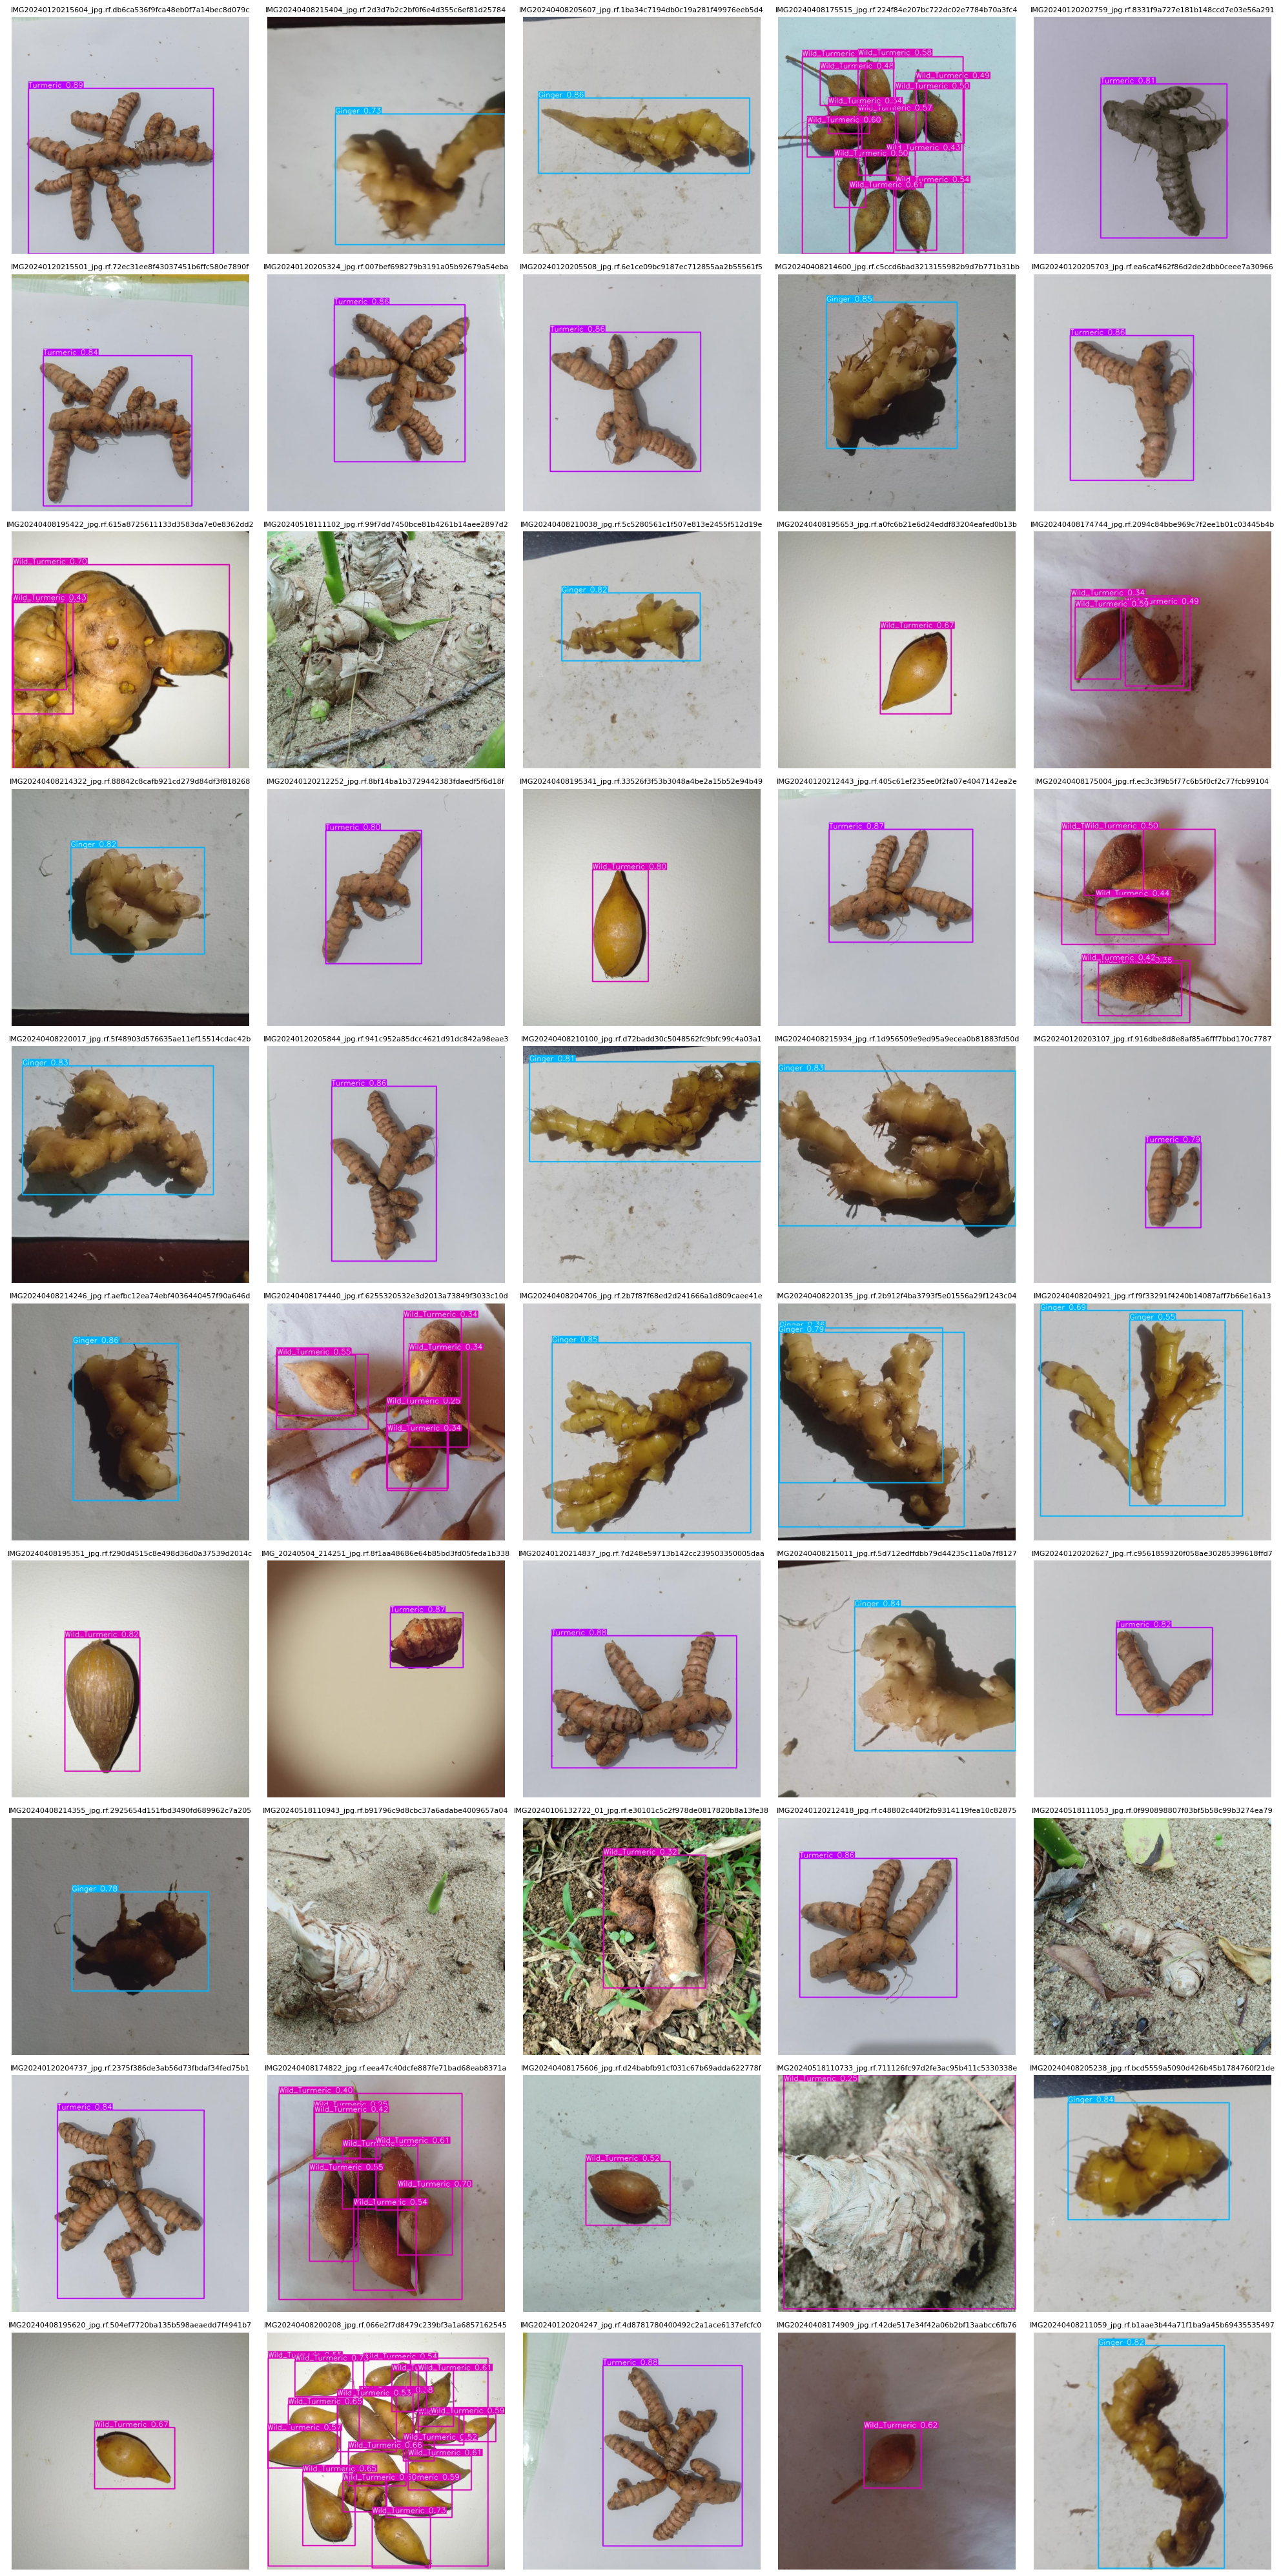

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Assuming results[0].save_dir and project are defined
image_files = [f for f in os.listdir(results[0].save_dir) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]

def save_predictions(images_per_row=5, max_images=50):
    # Split the images into chunks of 50
    for count, i in enumerate(range(0, len(image_files), max_images)):
        image_files_subset = image_files[i:i + max_images]

        # Calculate the number of rows needed
        n_rows = len(image_files_subset) // images_per_row + int(len(image_files_subset) % images_per_row > 0)

        # Create a figure with the necessary number of subplots
        fig, axs = plt.subplots(n_rows, images_per_row, figsize=(images_per_row * 4, n_rows * 4))

        # Flatten the axes array for easy iteration (in case of multiple rows)
        axs = axs.flatten() if n_rows > 1 else [axs]

        # Loop through the images and plot them
        for i, img_file in enumerate(image_files_subset):
            # Open the image
            img = Image.open(os.path.join(results[0].save_dir, img_file))

            # Display the image in the grid
            axs[i].imshow(img)

            # Turn off the axis labels
            axs[i].axis('off')

            # Set the filename as the title (use `splitext` to remove the file extension)
            axs[i].set_title(os.path.splitext(img_file)[0], fontsize=8)

        # Hide any remaining subplots (if the number of images is less than the number of subplots)
        for i in range(len(image_files_subset), len(axs)):
            axs[i].axis('off')

        # Adjust layout
        plt.tight_layout()

        # Save the figure with a specific name format
        plt.savefig(f'{project}/predict/predict{epochs}_{count}.png', bbox_inches='tight')
        plt.show()
        plt.close()

# Call the function to save predictions
save_predictions()


In [ ]:
predicts=[]

In [ ]:
for file in os.listdir(f'{project}/predict'):
  if os.path.isfile(f"{project}/predict/{file}"):
    blob = bucket.blob(f"{storagepath}/predicts/{file}")
    blob.upload_from_filename(f"{project}/predict/{file}")
    blob.make_public()
    predicts.append(blob.public_url)

In [ ]:
today_ref.collection('Predict').add({
    'files':predicts
})

(DatetimeWithNanoseconds(2024, 9, 13, 19, 59, 35, 692451, tzinfo=datetime.timezone.utc),
 <google.cloud.firestore_v1.document.DocumentReference at 0x7ebca0b13cd0>)

### Export Model

In [ ]:
format='onnx'
model.export(format=format,keras=True,dynamic=True,simplify=True,)

Ultralytics YOLOv8.2.93 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/content/drive/MyDrive/AyushVision/yolo8/training/13_09_2024/192456/tumber/runs/train50/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 36, 8400) (6.0 MB)

ONNX: starting export with onnx 1.16.2 opset 19...
ONNX: slimming with onnxslim 0.1.34...
ONNX: export success ✅ 20.7s, saved as '/content/drive/MyDrive/AyushVision/yolo8/training/13_09_2024/192456/tumber/runs/train50/weights/best.onnx' (11.6 MB)

Export complete (22.4s)
Results saved to /content/drive/MyDrive/AyushVision/yolo8/training/13_09_2024/192456/tumber/runs/train50/weights
Predict:         yolo predict task=detect model=/content/drive/MyDrive/AyushVision/yolo8/training/13_09_2024/192456/tumber/runs/train50/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/content/drive/MyDrive/AyushVision/yolo8/training/13_09_2024/192456/tumber/runs/train50/weights/best.onnx im

'/content/drive/MyDrive/AyushVision/yolo8/training/13_09_2024/192456/tumber/runs/train50/weights/best.onnx'

In [ ]:
model.export(format='saved_model',keras=True,simplify=True)

Ultralytics YOLOv8.2.93 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/content/drive/MyDrive/AyushVision/yolo8/training/13_09_2024/192456/tumber/runs/train50/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 36, 8400) (6.0 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'onnx2tf>1.17.5,<=1.22.3', 'tflite_support'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.6/136.6 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 167.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 207.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 98.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.0/241.0 kB 182.9 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 14.9s, installed 4 p

100%|██████████| 1.11M/1.11M [00:00<00:00, 118MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 49.60file/s]


ONNX: starting export with onnx 1.16.2 opset 19...


ONNX: slimming with onnxslim 0.1.34...
ONNX: export success ✅ 1.3s, saved as '/content/drive/MyDrive/AyushVision/yolo8/training/13_09_2024/192456/tumber/runs/train50/weights/best.onnx' (11.7 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...
TensorFlow SavedModel: export success ✅ 36.4s, saved as '/content/drive/MyDrive/AyushVision/yolo8/training/13_09_2024/192456/tumber/runs/train50/weights/best_saved_model' (29.3 MB)

Export complete (38.2s)
Results saved to /content/drive/MyDrive/AyushVision/yolo8/training/13_09_2024/192456/tumber/runs/train50/weights
Predict:         yolo predict task=detect model=/content/drive/MyDrive/AyushVision/yolo8/training/13_09_2024/192456/tumber/runs/train50/weights/best_saved_model imgsz=640  
Validate:        yolo val task=detect model=/content/drive/MyDrive/AyushVision/yolo8/training/13_09_2024/192456/tumber/runs/train50/weights/best_saved_model imgsz=640 data=/content/drive/MyDrive/AyushVision/yolo/dataset/final/data.yaml  
Visual

'/content/drive/MyDrive/AyushVision/yolo8/training/13_09_2024/192456/tumber/runs/train50/weights/best_saved_model'

In [ ]:
model.export(format='tflite',keras=True,simplify=True)

Ultralytics YOLOv8.2.93 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/content/drive/MyDrive/AyushVision/yolo8/training/13_09_2024/192456/tumber/runs/train50/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 36, 8400) (6.0 MB)

TensorFlow SavedModel: starting export with tensorflow 2.17.0...

ONNX: starting export with onnx 1.16.2 opset 19...
ONNX: slimming with onnxslim 0.1.34...
ONNX: export success ✅ 2.4s, saved as '/content/drive/MyDrive/AyushVision/yolo8/training/13_09_2024/192456/tumber/runs/train50/weights/best.onnx' (11.8 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...
TensorFlow SavedModel: export success ✅ 33.5s, saved as '/content/drive/MyDrive/AyushVision/yolo8/training/13_09_2024/192456/tumber/runs/train50/weights/best_saved_model' (29.5 MB)

TensorFlow Lite: starting export with tensorflow 2.17.0...
TensorFlow Lite: export success ✅ 0.0s, saved as '/content/drive/MyDrive/AyushVis

'/content/drive/MyDrive/AyushVision/yolo8/training/13_09_2024/192456/tumber/runs/train50/weights/best_saved_model/best_float32.tflite'

In [ ]:
blob = bucket.blob(f"{storagepath}/model/best.onnx")
blob.upload_from_filename(f"{today_work_dirctory}/tumber/runs/{name}/weights/best.onnx")
blob.make_public()

In [ ]:
blobsavedmodel = bucket.blob(f"{storagepath}/model/best_saved_model.pb")
blobsavedmodel.upload_from_filename(f"{today_work_dirctory}/tumber/runs/{name}/weights/best_saved_model/saved_model.pb")
blobsavedmodel.make_public()

In [ ]:
blobtflite = bucket.blob(f"{storagepath}/model/best_float32.tflite")
blobtflite.upload_from_filename(f"{today_work_dirctory}/tumber/runs/{name}/weights/best_saved_model/best_float32.tflite")
blobtflite.make_public()

In [ ]:
today_ref.collection('Model').add({
    'format':format,
    "keras":True,
    "dynamic":True,
    "simplify":True,
    "model":blob.public_url,
    "tflite":blobtflite.public_url,
    "save_model":blobsavedmodel.public_url
})

(DatetimeWithNanoseconds(2024, 9, 13, 20, 19, 47, 777199, tzinfo=datetime.timezone.utc),
 <google.cloud.firestore_v1.document.DocumentReference at 0x7ebcd00a0040>)

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="iW0ic53GGPbz3kP5MbgZ")
project = rf.workspace("research-piohe").project("ayushvision")
version = project.version(4)
# dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [1]:
! pip install ultralytics==8.0.196

In [4]:
project.version(4).deploy(model_type="yolov8", model_path=f"/content/drive/MyDrive/AyushVision/yolo8/training/24_09_2024/074426/tumber/runs/train60/")

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


View the status of your deployment at: https://app.roboflow.com/research-piohe/ayushvision/4
Share your model with the world at: https://universe.roboflow.com/research-piohe/ayushvision/model/4
